Grupo:

HENNY ROCIO CARRILLO
hcarril42467@universidadean.edu.co

WILBER ALEXANDER RODRIGUEZ CASTRO
wrodrig96546@universidadean.edu.co

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import sympy as sp
from scipy.stats import expon
from scipy.stats import norm
from sympy import*
import seaborn as sns

Ejercicio 1: Tiempo de Espera en una Parada de Autobús

En una parada de autobús, el tiempo de espera para el próximo autobús sigue una distribución exponencial con una tasa de llegada promedio de 4 autobuses por hora.

a) ¿Cuál es la probabilidad de que un pasajero espere menos de 10 minutos por el próximo autobús?

Dado que $λ=4$ tiempo de llegadas promedio por hora

$$\frac{Horas}{minutos}=\frac{1}{60}=\ \frac{x}{10}$$

$$x\ =10\ast\frac{1}{60}= \frac{1}{6}$$

In [2]:
Probabilidad = expon.cdf(1/6, scale=1/4)
print(f"Probabilidad de que un pasajero espere menos de 10 minutos por el próximo autobús es: {Probabilidad:.4f}")

Probabilidad de que un pasajero espere menos de 10 minutos por el próximo autobús es: 0.4866


Rta: Hay un 48.6% de probabilidad de que un pasajero espere menos de 10 minutos el próximo bus

b) Simula en Python 1000 tiempos de espera y representa el histograma de la distribución.

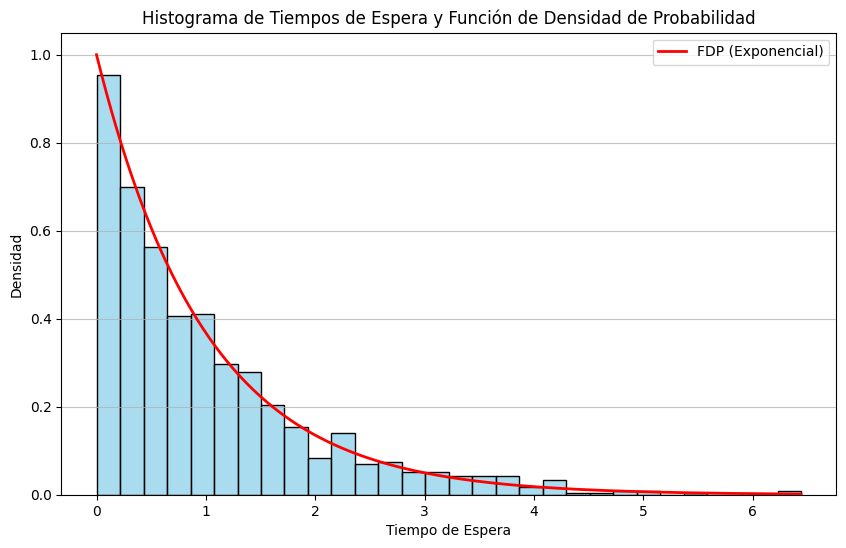

In [42]:
# Parámetro de la distribución exponencial (lambda)
lambda_param = 1.0  # Tasa de ocurrencia

# Simular 1000 tiempos de espera
tiempos_espera = np.random.exponential(1/lambda_param, 1000)

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(tiempos_espera, bins=30, kde=False, stat='density', color='skyblue', edgecolor='black', alpha=0.7)

# Graficar la función de densidad de probabilidad (FDP) de la distribución exponencial
x = np.linspace(0, max(tiempos_espera), 1000)
pdf = lambda_param * np.exp(-lambda_param * x)

plt.plot(x, pdf, 'r-', lw=2, label='FDP (Exponencial)')
plt.title('Histograma de Tiempos de Espera y Función de Densidad de Probabilidad')
plt.xlabel('Tiempo de Espera')
plt.ylabel('Densidad')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


Ejercicio 2: Puntuaciones en un Examen

Las puntuaciones de un examen siguen una distribución normal con una media de 70 y una desviación estándar de 8.

a) ¿Cuál es la probabilidad de que un estudiante obtenga una puntuación entre 65 y 85?

* $μ$ = 70
* $σ$ = 8

In [157]:
media=70
Desviacion=8
Z1=65
Z2=85

# Se realiza calculo de probabilidad para los valores dados
Probabilidad_inf= norm.cdf(Z1, media, Desviacion)
Probabilidad_sup=norm.cdf(Z2, media, Desviacion)
# La probabilidad de que un estudiante obtenga una puntuación entre 65 y 85
probabilidad_estudiante= Probabilidad_sup - Probabilidad_inf
print(f"La probabilidad de que un estudiante obtenga una puntuación entre 65 y 85 es: {probabilidad_estudiante:.4f}")

La probabilidad de que un estudiante obtenga una puntuación entre 65 y 85 es: 0.7036


b) Si se requiere estar en el 10% superior para aprobar con honores, ¿cuál es la puntuación mínima necesaria?

In [158]:
percentil=0.90
puntuacion=norm.ppf(percentil, media, Desviacion)
print(f"La puntuación mínima necesaria para estar en el 10% superior es: {puntuacion:.2f}")

La puntuación mínima necesaria para estar en el 10% superior es: 80.25


c) Genera en Python una muestra aleatoria de 500 puntuaciones y representa su distribución mediante un histograma.

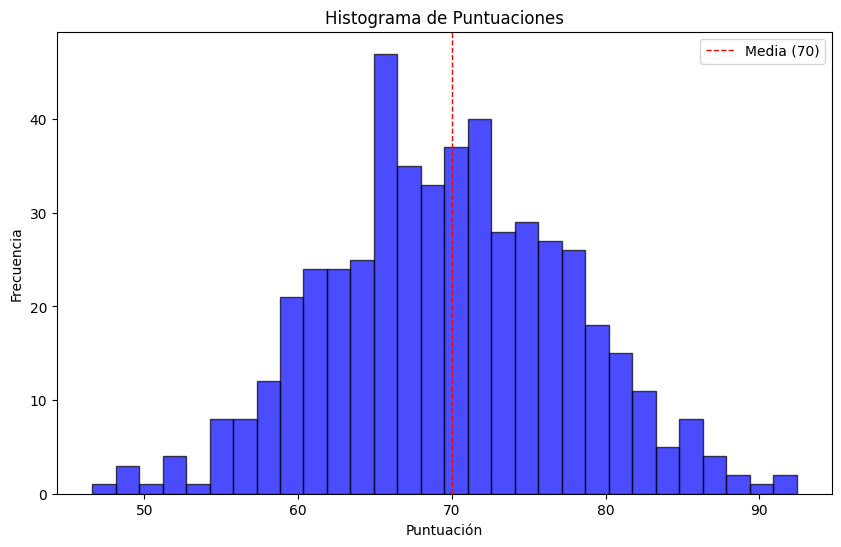

In [ ]:
n_puntuaciones=500
muestra = np.random.normal(media, Desviacion, n_puntuaciones)
plt.figure(figsize=(10, 6))
plt.hist(muestra, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Puntuaciones')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label='Media (70)')
plt.legend()
plt.show()

Ejercicio 3: Defectos en un Proceso de Manufactura

En una línea de producción, el número de defectos por metro de tela sigue una distribución de Poisson con una media de 2 defectos por metro.

a) ¿Cuál es la probabilidad de encontrar exactamente 3 defectos en un metro de tela?

In [59]:
from scipy.stats import poisson
media_defectos = 2
Defectos=poisson.pmf(3, media_defectos)
print(f"La probabilidad de encontrar exactamente 3 defectos es: {Defectos:.4f}")

La probabilidad de encontrar exactamente 3 defectos es: 0.1804


b) ¿Cuál es la probabilidad de que haya al menos un defecto en un metro de tela?

In [72]:
prob_no_defectos = poisson.pmf(0, media_defectos)
prob_1_defecto = 1 - prob_no_defectos
print(f"La probabilidad de que haya al menos un defecto en un metro de tela es: {prob_1_defecto:.4f}")

La probabilidad de que haya al menos un defecto en un metro de tela es: 0.8647


c) Simula en Python el número de defectos en 1000 metros de tela y representa el histograma correspondiente.

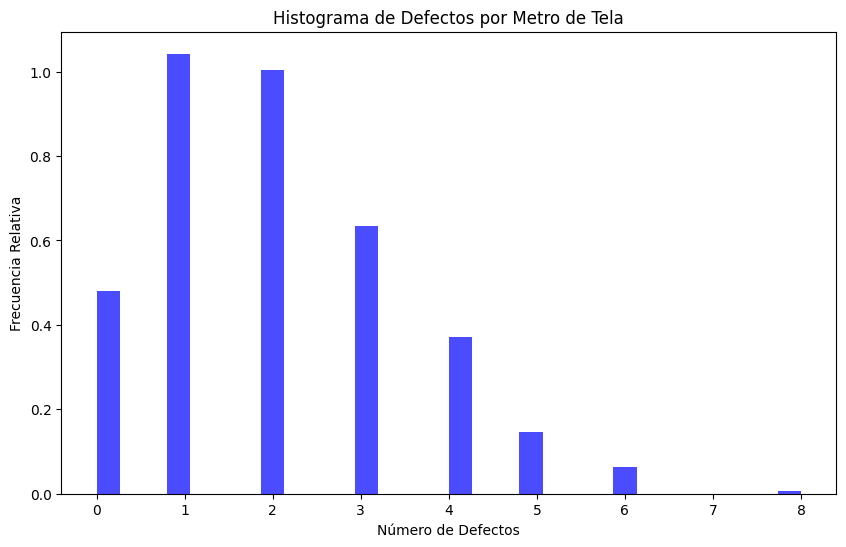

In [120]:
lambda_def = 2  # Media de defectos por metro
n_defectos = 1000  # Número de metros de tela

# Simulación del número de defectos en 1000 metros de tela aleatoriamente
Variable_aleatoria = poisson.rvs(lambda_def, size=n_defectos)

# Representación del histograma
plt.figure(figsize=(10, 6))
plt.hist(Variable_aleatoria, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Histograma de Defectos por Metro de Tela')
plt.xlabel('Número de Defectos')
plt.ylabel('Frecuencia Relativa')
plt.xticks(range(Variable_aleatoria.max() + 1))
plt.show()

Ejercicio 4: Vida Útil de una Batería

La vida útil (en horas) de una batería sigue una distribución gamma con forma 
k=3 y escala 
θ=500 horas.

a) ¿Cuál es la probabilidad de que una batería dure más de 1500 horas?

In [78]:
from scipy.stats import gamma

k=3
θ=500
x = 1500
probabilidad_bateria = 1 - gamma.cdf(x, k, scale=θ)

print(f"La probabilidad de que una batería dure más de 1500 horas es: {probabilidad_bateria:.4f}")

La probabilidad de que una batería dure más de 1500 horas es: 0.4232


b) Calcula y representa en Python la función de densidad de probabilidad (PDF) de la distribución.

<module 'matplotlib.pyplot' from 'c:\\Users\\Personal\\.conda\\envs\\mi_primer_ambiente\\Lib\\site-packages\\matplotlib\\pyplot.py'>

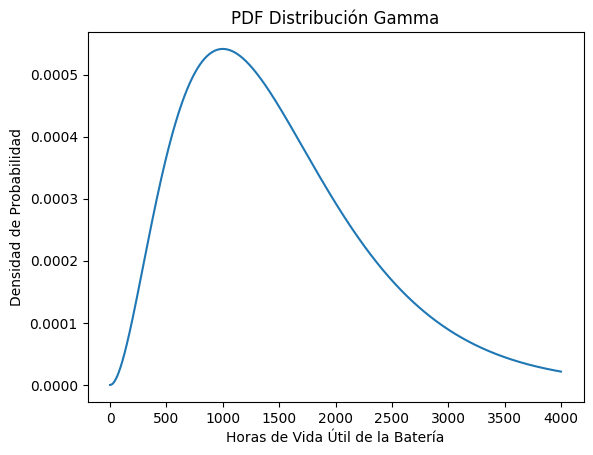

In [79]:
x = np.linspace(0, 4000, 1000)
fdp = gamma.pdf(x, k, scale=θ)

# Crear la gráfica de la FDP
plt.plot(x, fdp, label='FDP Gamma')
plt.title('PDF Distribución Gamma')
plt.xlabel('Horas de Vida Útil de la Batería')
plt.ylabel('Densidad de Probabilidad')
plt

Ejercicio 5: Lluvias en una Región

El número de días de lluvia en un mes en una región sigue una distribución binomial con 
n=30 días y una probabilidad diaria de lluvia de 
p=0.2.

a) ¿Cuál es la probabilidad de que llueva exactamente 8 días en un mes?.


In [85]:
n=30
p=0.2
k=8 # dias en un mes
from scipy.stats import binom

probabilidad_lluvia = binom.pmf(k, n, p)
print(f"La probabilidad de que llueva exactamente 8 dias en un mes es: {round(probabilidad_lluvia, 4)}")

La probabilidad de que llueva exactamente 8 dias en un mes es: 0.1106


b) Simula en Python el número de días de lluvia durante un año (12 meses) y representa la distribución de frecuencias

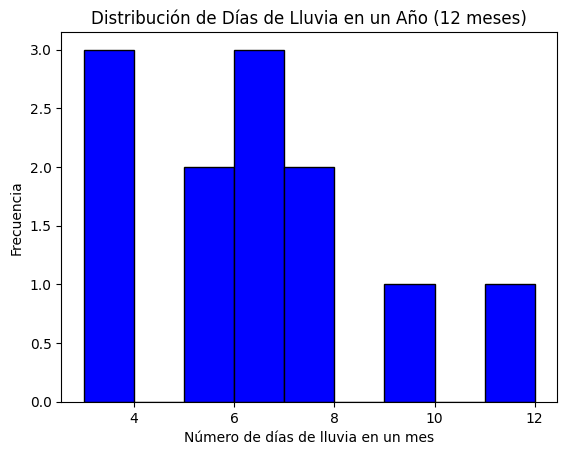

In [154]:
n_dias = 30  # Número de días en un mes
p_lluvia = 0.2  # Probabilidad de lluvia en un día
n_meses = 12  # Número de meses en un año
day_y=30 * 12

# Simulación del número de días de lluvia al año
simulacion_lluvias = binom.rvs(n=1, p=p, size=day_y)
# Simulación del número de días de lluvia en cada mes
simulacion_lluvias_m =  np.add.reduceat(simulacion_lluvias, np.arange(0, day_y, 30))

plt.hist(simulacion_lluvias_m, bins=range(min(simulacion_lluvias_m), max(simulacion_lluvias_m) + 2), color='blue', edgecolor='black')
plt.title('Distribución de Días de Lluvia en un Año (12 meses)')
plt.xlabel('Número de días de lluvia en un mes')
plt.ylabel('Frecuencia')
plt.show()

Ejercicio 6: Control de Calidad en una Fábrica de Bombillas

Una fábrica produce bombillas que, según especificaciones, tienen una vida útil que sigue una distribución normal con una media de 800 horas y una desviación estándar de 50 horas. Un ingeniero sospecha que una nueva máquina está produciendo bombillas con una vida útil diferente. Para comprobarlo, toma una muestra aleatoria de 36 bombillas producidas por la nueva máquina y encuentra que la vida útil media es de 785 horas.

a) Plantee las hipótesis nula y alternativa para probar si la nueva máquina está produciendo bombillas con una vida útil diferente a la especificada.

$H_0$ : La nueva maquina produce bombillas con una vida util de (μ=800)

$H_1$ : La nueva maquina produce bombillas con una vida util de (μ≠800)



b) Utilice un nivel de significancia del 5% para realizar la prueba de hipótesis.

* $u_0$ = 800 $horas$ # media_poblacional
* $\bar{x_1} = 785$ $horas$ # media_muestral
* $\sigma_1$ = $50$ $horas$ # Desviacion_est_p
* $n$ = $36$ # tamaño_muestra

In [24]:
from scipy.stats import norm
m_pob = 800
m_mues = 785
dev_est = 50
n=36
alpha=0.05
# Estadistico de prueba
Z = (m_mues - m_pob) / (dev_est / np.sqrt(n))
print(f'Estadístico z: {Z:.4f}, la media de la muestra esta {Z:.4f} desviaciones de la media poblacional')

# Valor critico

valor_critico = norm.ppf(1 - alpha / 2, 0, 1)
print(f"Valor crítico z para un nivel de confianza del 95%: {z_critical:.4f}")
margen_error = valor_critico * (dev_est / np.sqrt(n))
ci_lower = m_mues - margen_error
ci_upper = m_mues + margen_error
print(f"Intervalo de confianza al {(1- alpha)*100}%: ({ci_lower:.2f}, {ci_upper:.2f})")

Estadístico z: -1.8000, la media de la muestra esta -1.8000 desviaciones de la media poblacional
Valor crítico z para un nivel de confianza del 95%: 1.9600
Intervalo de confianza al 95.0%: (768.67, 801.33)


c) Calcule el valor p de la prueba.

In [43]:
p_valor = norm.cdf(Z,0,1)
p_valor #Debemos multiplicar por dos porque estamos mirando ambas colas

# Dado que es una prueba de dos colas  multipicamos el p_valor por 2
p_valor1= p_valor * 2
p_valor1

print(f"p_valor1: {p_valor1:.4f}")


#2*p_valor < 0.05 #el p valor en ambas colas es mayor al nivel de significancia 

if p_valor1 < alpha:
    print("Rechazamos la hipótesis nula. La vida media de las bombillas es de 800 horas.")
else:
    print("Dado que el valor p (0.0734) es mayor que el nivel de significancia (0.05) No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que la nueva máquina está produciendo bombillas con una vida útil diferente a 800 horas.")

p_valor1: 0.0719
Dado que el valor p (0.0734) es mayor que el nivel de significancia (0.05) No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que la nueva máquina está produciendo bombillas con una vida útil diferente a 800 horas.



d) ¿Cuál es su conclusión respecto a la nueva máquina?

* No hay evidencia suficiente para afirmar que la nueva máquina produce bombillas con una vida útil diferente.
* El valor del estadístico Z es -1.8000 está dentro del rango de [−1.96,1.96] por lo tanto no rechazamos la hipótesis nula

Ejercicio 7: Efectividad de un Nuevo Medicamento

Un laboratorio farmacéutico ha desarrollado un nuevo medicamento para reducir la presión arterial. Se sabe que la presión arterial sistólica de la población sigue una distribución normal con una media de 120 mmHg y una desviación estándar de 15 mmHg. Se administra el nuevo medicamento a una muestra de 25 pacientes, y se observa que la presión arterial media es de 112 mmHg.

a) Plantee las hipótesis nula y alternativa para determinar si el medicamento reduce significativamente la presión arterial.

$H_0$ : El medicamento no reduce la presión arterial. La media de presión arterial

$H_1$ : El medicamento reduce la presión arterial. La media de presión arterial

b) Realice la prueba de hipótesis utilizando un nivel de significancia del 1%.

Dado a que la poblacion sigue una distribucion normal y se conoce la desviacion estandar, se utilizara una prueba Z
* $u_0$ = 120 $mmHg$ # media_poblacional
* $\bar{x_1} = 112$ $mmHg$ # media_muestral
* $\sigma_1$ = $15$ $mmHg$ # Desviacion_est_p
* $n$ = $25$ # tamaño_muestra

In [90]:
m_pob = 120
m_mues = 112
dev_est = 15
n=25
alpha=0.01
# Estadistico de prueba
Z = (m_mues - m_pob) / (dev_est / np.sqrt(n))
print(f'Estadístico z: {Z:.4f}, la media de la muestra esta {Z:.4f} desviaciones de la media poblacional')

# Valor critico

valor_critico = norm.ppf(alpha,0,1)
print(f"Valor crítico z para un nivel de confianza del 95%: {valor_critico:.4f}")

Estadístico z: -2.6667, la media de la muestra esta -2.6667 desviaciones de la media poblacional
Valor crítico z para un nivel de confianza del 95%: -2.3263


c) Calcule el valor p de la prueba.

In [54]:
p_valor = norm.cdf(Z)
print(f"p_valor: {p_valor:.4f}")

if p_valor < alpha:
    print("Rechazamos la hipótesis nula. dado a que el medicamento reduce significativamente la presión arterial")
else:
    print("No rechazamos la hipótesis nula. El medicamento no reduce significativamente la presión arterial")


p_valor: 0.0038
Rechazamos la hipótesis nula. dado a que el medicamento reduce significativamente la presión arterial


d) Interprete los resultados y determine si el medicamento es efectivo.

* Dado que el valor p (0.0037) es menor que el nivel de significancia (0.01), rechazamos la hipótesis nula.
* El estadistico z -2.6667 es < al valor_critico -2.3263 cae en la zona de rechazo, tenemos evidencia suficiente para rechazar la hipótesis nula
* Podemos concluir que hay evidencia suficiente para afirmar que el medicamento reduce significativamente la presión arterial. Lo cual significa que el nuevo medicamento es efectivo para reducir la presión arterial en los pacientes estudiados.

Ejercicio 8: Tasas de Llegadas en un Centro de Llamadas

El número de llamadas que recibe un centro de atención al cliente sigue una distribución de Poisson con una media de 5 llamadas por minuto. El gerente implementa un nuevo sistema y desea saber si ha afectado la tasa de llamadas. Durante un periodo de 30 minutos, registra un total de 180 llamadas.
c) Determine si hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado.



a) Plantee las hipótesis para probar si el nuevo sistema ha cambiado la tasa de llamadas.

$H_0$ : No Hay afectación en la tasa de llamadas λ=5

$H_1$ : Hay afectación en la tasa de llamadas λ diferente 5

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

Dado que el número de llamadas sigue una distribución de Poisson, podemos usar la aproximación normal para grandes valores de 
𝑛
n (en este caso, 180 llamadas en 30 minutos).

•	λ(esperado)=5∗30 cantidad de llamadas en 30 minutos

•	λ=150 llamadas en 30 minutos, como lambda es lo suficientemente grande podemos aproximar la distribucion a una normal

In [71]:
from scipy.stats import norm

llamadas_esp=5 * 30
llamadas_ob=180
dev_est=np.sqrt(llamadas_esp)

z = ( llamadas_ob- llamadas_esp) / dev_est
print(f'Estadístico z: {z:.4f}, el valor z esta {z:.4f} desviaciones estandar de la desviacion de la hipotesis nula')

valor_critico = norm.ppf(1 - (0.05 / 2))  # Para un nivel de confianza del 95%
print(f'Valor crítico z: {valor_critico:.4f}')


Estadístico z: 2.4495, el valor z esta 2.4495 desviaciones estandar de la desviacion de la hipotesis nula
Valor crítico z: 1.9600


c) Determine si hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado.

In [73]:
if z < valor_critico :
    print('Aceptamos la hipotesis nula y la tasa de llamadas es la misma')
else:
    print('el estadistico z cae en el area de rechazo, y el nuevo sistema cambio la tasa de llamadas')


el estadistico z cae en el area de rechazo, y el nuevo sistema cambio la tasa de llamadas


Hipótesis nula:  λ=5 (no ha cambiado) 

Hipótesis alternativa:  𝜆 ≠ 5 (ha cambiado)

Estadístico Z: 2.45

Decisión: Rechazamos $H0$
​
* Dado que el estadístico Z cae en la región de rechazo, hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado.

Ejercicio 9: Preferencia de Marca

Una empresa desea saber si la proporción de clientes que prefieren su marca ha aumentado después de una campaña publicitaria. Antes de la campaña, el 40% de los clientes prefería su marca. Después de la campaña, en una muestra de 200 clientes, 100 indican preferir su marca.

a) Establezca las hipótesis nula y alternativa.

$H_0$ :  La proporcion de clientes que prefiente la marca no ha aumentado $p$ = 40%

$H_1$ : La proporcion de clientes que prefiente la marca ha aumentado  $p$ > 40%

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

Proporción antes de la campaña ($p_0$): 0.40

Proporción muestral = 0.50

Tamaño de la muestra (𝑛) : 200

Estadístico de prueba $z=\cfrac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$

In [98]:
p_muestra= 0.50
n=200
p_0= 0.40
x = 100
p_obser=x/n
alpha=0.05 # una cola

Z = (p_obser - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)
print(f'Estadístico z: {Z:.4f} el valor z esta {Z:.4f} desviaciones estandar de la desviacion de la hipotesis nula')
valor_critico = norm.ppf(1 - alpha)
print(f'Valor crítico z: {valor_critico:.4f}')


Estadístico z: 2.8868 el valor z esta 2.8868 desviaciones estandar de la desviacion de la hipotesis nula
Valor crítico z: 1.6449


c) Calcule el valor p y concluya si la campaña fue efectiva en aumentar la preferencia de marca.

In [99]:
p_valor = 1 - norm.cdf(Z)
print(f" p valor: {p_valor:.4f}")
if p_valor < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que la campaña fue efectiva en aumentar la preferencia de marca.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que la campaña fue efectiva en aumentar la preferencia de marca.")

 p valor: 0.0019
Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que la campaña fue efectiva en aumentar la preferencia de marca.


Hay evidencia suficiente para afirmar que la campaña publicitaria fue efectiva en aumentar la preferencia de la marca entre los clientes.

Ejercicio 10: Evaluación de un Programa Educativo


Una escuela implementa un nuevo programa educativo y quiere evaluar su efectividad en las calificaciones de matemáticas. Históricamente, las calificaciones siguen una distribución normal con una media de 70 y una desviación estándar de 10. Después de implementar el programa, una muestra de 50 estudiantes tiene una calificación media de 73.

a) Formule las hipótesis nula y alternativa para determinar si el programa ha mejorado las calificaciones.

$H_0$ : El programa educativo no ha mejorado las calificaciones. $H_0$: $μ$=70

$H_1$ : El programa educativo ha mejorado las calificaciones. $H_0$: $μ$ > 70

b) Utilice un nivel de significancia del 2% para realizar la prueba

Media histórica ($𝜇_0$: 70)

Media de la muestra ($\bar{x_1}$: 73)

Desviación estándar histórica (𝜎): 10

Tamaño de la muestra (𝑛): 50

Nivel de significancia (𝛼): 0.02

In [105]:
mu_0 = 70  # Media poblacional historica
sigma = 10  # Desviación estándar poblacional historica
n = 50  # Tamaño de la muestra
x_mu = 73  # Media de la muestra
alpha= 0.02 # nivel de significancia

z = (x_mu - mu_0) / (sigma / np.sqrt(n))
print(f'Estadístico z: {z:.4f}')
# prueba del valor critico z para la cola derecha
valor_critico = norm.ppf(1 - alpha)
print(f'Valor crítico z: {valor_critico:.4f}')

Estadístico z: 2.1213
Valor crítico z: 2.0537


c) ¿El programa educativo ha tenido un impacto significativo en las calificaciones?

In [108]:
p_valor = 1 - norm.cdf(z)
print(f'p-valor: {p_valor:.4f}')

if p_valor < alpha:
    print("Rechazamos la hipótesis nula: el programa ha tenido un impacto significativo en las calificaciones.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de que el programa haya sido efectivo.")

p-valor: 0.0169
Rechazamos la hipótesis nula: el programa ha tenido un impacto significativo en las calificaciones.


* Dado que z 2.121 > z_critical 2.054, el valor de z está en la región de rechazo y por lo tanto el programa educativo ha tenido un impacto en las calificaciones.

* Con un nivel de significancia del 2%, hay evidencia suficiente para concluir que el programa educativo ha tenido un impacto significativo en las calificaciones de matemáticas, ya que las calificaciones han mejorado respecto a la media histórica.


Ejercicio 11: Efectividad de dos métodos de enseñanza

Un investigador educativo quiere comparar la efectividad de dos métodos de enseñanza diferentes en el rendimiento de los estudiantes. Se seleccionan aleatoriamente 30 estudiantes y se dividen en dos grupos de 15 estudiantes cada uno. El primer grupo es enseñado con el método tradicional y el segundo grupo con el nuevo método. Después de un mes, se les aplica un examen estandarizado.

Grupo 1 (Método Tradicional): Media = 75, Desviación estándar = 8
Grupo 2 (Nuevo Método): Media = 80, Desviación estándar = 6


a) Formule las hipótesis nula y alternativa para determinar si hay una diferencia significativa en las medias de los dos grupos.

* $H_0$: No hay diferencia significativa  en las medias de los dos grupos. $μ_1$ = $μ_2$

* $H_1$: El programa ha mejorado las calificaciones. $μ_1$ diferente $μ_2$

b) Utilice una prueba t para muestras independientes con un nivel de significancia del 5% para analizar los datos.

In [115]:
from scipy.stats import t

x1 = 75  # Media del Grupo 1
s1 = 8  # Desviación estándar del Grupo 1
n1 = 15  # Tamaño de la muestra del Grupo 1
x2 = 80  # Media del Grupo 2
s2 = 6  # Desviación estándar del Grupo 2
n2 = 15  # Tamaño de la muestra del Grupo 2
alpha = 0.05
t_stat = (x1 - x2) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
print(f'Estadístico t: {t_stat:.4f}')
# calculo de valor critico para t
alpha = 0.05
df = n1 + n2 - 2  # Grados de libertad
valor_critico = t.ppf(1 - alpha / 2, df)
print(f'Valor crítico t: ±{valor_critico:.4f}')


Estadístico t: -1.9365
Valor crítico t: ±2.0484


c) Interprete los resultados y concluya si el nuevo método es más efectivo.

In [118]:
p_valor = 2 * (1 - t.cdf(abs(t_stat), df)) # calculamos la probabilidad en la cola derecha y lo multiplicamos por 2 para hayar ambas colas. 
print(f'p-valor: {p_valor:.4f}')

if p_valor < alpha:
    print("Rechazamos la hipótesis nula: el nuevo método es más efectivo.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para concluir que el nuevo método sea más efectivo.")


p-valor: 0.0630
No rechazamos la hipótesis nula: no hay evidencia suficiente para concluir que el nuevo método sea más efectivo.


* Teniendo en cuenta que −1.94 no es menor que −2.048 ni mayor que 2.048, no rechazamos la hipótesis nula.

* No hay suficiente evidencia estadística para concluir que hay una diferencia significativa en el rendimiento académico entre los estudiantes que usaron el método tradicional y los que usaron el nuevo método. Por lo tanto, no podemos afirmar que el nuevo método sea más efectivo que el método tradicional.

Ejercicio 12: Efecto de un programa de ejercicio en la presión arterial

Un médico quiere evaluar si un programa de ejercicio regular reduce la presión arterial sistólica en pacientes hipertensos. Se mide la presión arterial de 20 pacientes antes y después de participar en el programa durante 8 semanas.

Presión arterial media antes: 150 mmHg
Presión arterial media después: 140 mmHg
Desviación estándar de las diferencias: 10 mmHg
a) Establezca las hipótesis nula y alternativa para determinar si el programa reduce la presión arterial.

a) Establezca las hipótesis nula y alternativa para determinar si el programa reduce la presión arterial.

$H_0$: El programa de ejercicio no reduce la presión arterial, la media de las diferencias es cero. $𝜇_𝑑$ = 0

$H_1$: El programa de ejercicio reduce la presión arterial, la media de las diferencias es menor que cero  $𝜇_𝑑$ <0


b) Realice una prueba t para muestras relacionadas (pareadas) al nivel de significancia del 1%.

In [126]:
from scipy.stats import t
m_diferencias = 10  # Media de las diferencias
desv_diferencias = 10  # Desviación estándar de las diferencias
n = 20  # Tamaño de la muestra
alpha = 0.01  # Nivel de significancia

t_estadistico = m_diferencias / (desv_diferencias / np.sqrt(n))
print(f'Estadístico t: {t_estadistico:.4f}')

valor_critico = t.ppf(1 - alpha, n - 1) #con 19 grados de libertad
print(f'Valor crítico t: {valor_critico:.4f}')


Estadístico t: 4.4721
Valor crítico t: 2.5395


c) ¿Es efectivo el programa de ejercicio para reducir la presión arterial?

In [131]:
p_valor = t.sf(t_stat, n - 1)
print(f'p-valor: {p_valor:.4f}')

if p_valor < alpha:
    print("Rechazamos la hipótesis nula: el programa es efectivo para reducir la presión arterial.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de que el programa sea efectivo.")

p-valor: 0.0001
Rechazamos la hipótesis nula: el programa es efectivo para reducir la presión arterial.


Dado a que se rechaza la hipótesis nula, se concluye que hay evidencia suficiente para concluir que el programa de ejercicio regular es efectivo para reducir la presión arterial en pacientes hipertensos al nivel de significancia del 1%

Ejercicio 13: Comparación de salarios entre dos departamentos

En una empresa, se quiere saber si existe una diferencia en los salarios promedio entre el departamento de ventas y el departamento de marketing. Se toman muestras aleatorias de empleados de ambos departamentos.

Ventas (n = 25): Media = $50,000, Desviación estándar = $5,000
Marketing (n = 30): Media = $52,000, Desviación estándar = $6,000

a) Plantee las hipótesis para probar si hay una diferencia significativa en los salarios medios de los dos departamentos.

$H_0$: No hay diferencia significativa en los salarios promedios de los dos departamentos (ventas y marketin). μ1=μ2

$H_1$: Hay evidencia significativa en los salirios promedios de los dos departamentos (ventas y marketin).μ1≠μ2

b) Realice una prueba t para muestras independientes con un nivel de significancia del 5%, asumiendo que las varianzas son iguales.

In [140]:
# Datos departamento de ventas

x1 = 50000  # Media
s1 = 5000  # Desviación estándar
n1 = 25  # Tamaño de la muestra

# Datos departamento de Marketing
x2 = 52000  # Media
s2 = 6000  # Desviación estándar
n2 = 30  # Tamaño de la muestra
alpha = 0.05
#Varianzas iguales

## prueba t para muestras independientes

##Calculamos la desviacion estandar combinada 
S_p2 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)
print(f'Varianza combinada {S_p2}')

t_estadistico = (x1 - x2) / np.sqrt(S_p2 * (1/n1 + 1/n2))
print(f'Estadístico t: {t_estadistico:.4f}')

# Grados de libertad
df = n1 + n2 - 2
# Valor crítico para una prueba de dos colas
valor_critico = stats.t.ppf(1 - alpha / 2, df)
print(f'Valor crítico t: ±{valor_critico:.4f}')

Varianza combinada 31018867.9245283
Estadístico t: -1.3261
Valor crítico t: ±2.0057


c) Concluya si hay una diferencia significativa en los salarios entre los dos departamentos.

In [141]:
#Prueba de valor
p_valor = 2 * stats.t.sf(np.abs(t_estadistico), df)
print(f'p-valor: {p_valor:.4f}')
# Conclusión
if p_valor < alpha:
    print("Se rechaza la hipótesis nula. Hay una diferencia significativa en los salarios.")
else:
    print("No se rechaza la hipótesis nula. No hay una diferencia significativa en los salarios.")

p-valor: 0.1905
No se rechaza la hipótesis nula. No hay una diferencia significativa en los salarios.


El valor t calculado es −1.327, que se encuentra entre −2.004 y 2.004.

No rechazamos la hipótesis nula $𝐻_0$. Dado a que no hay suficiente evidencia al nivel de significancia del 5% para afirmar que existe una diferencia significativa en los salarios promedio entre el departamento de ventas y el marketing.

Ejercicio 14: Asociación entre Género y Preferencia de Producto (Prueba Chi-cuadrado)

Una empresa desea saber si existe una asociación entre el género de los consumidores y su preferencia por tres tipos de productos: A, B y C. Se realiza una encuesta a 200 personas y se obtienen los siguientes resultados:

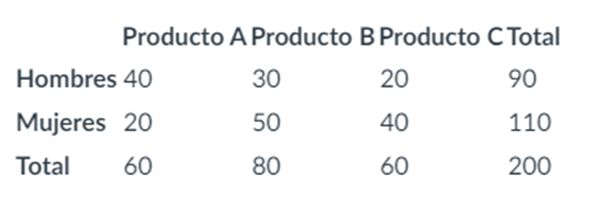


a) Formule las hipótesis nula y alternativa para determinar si hay una asociación significativa entre el género y la preferencia de producto.

$H_0$: No hay asociación significativa entre el género y la preferencia de productos  A, B y C.

$H_1$: Hay asociación significativa entre el género y la preferencia de productos  A, B y C.

b) Realice una prueba chi-cuadrado de independencia al nivel de significancia del 5%.

In [153]:
from scipy.stats import chi2_contingency

In [155]:
#Datos observados 
datos = {'Producto A': [40,20,60],
        'Producto B': [30, 50, 80],
        'Producto C': [20, 40, 60],
        'Total': [90, 110, 200]
}

index = ['Hombres', 'Mujeres', 'Total']

Tabla = pd.DataFrame(data, index=index)
Tabla

,Producto A,Producto B,Producto C,Total
Hombres,40,30,20,90
Mujeres,20,50,40,110
Total,60,80,60,200


In [174]:
from scipy.stats import chi2
#Cálculo de las frecuencias esperadas
d_observado = np.array([[40, 30, 20],[20, 50, 40]])
chi2_stat, p_valor, df, expected = chi2_contingency(d_observado)
print(f'Estadístico Chi-cuadrado: {chi2_stat:.4f}')
print(f'p-valor: {p_valor:.4f}')
print(f'Grados de libertad: {df}')
print('Frecuencias esperadas:')
print(expected)

alpha = 0.05  # Nivel de significancia
df = 2  # Grados de libertad

# Cálculo del valor crítico chi-cuadrado
valor_critico_chi2 = chi2.ppf(1 - alpha, df)
print(f"Valor crítico Chi-cuadrado: {valor_critico_chi2:.4f}")


Estadístico Chi-cuadrado: 16.4983
p-valor: 0.0003
Grados de libertad: 2
Frecuencias esperadas:
[[27. 36. 27.]
 [33. 44. 33.]]
Valor crítico Chi-cuadrado: 5.9915


c) Interprete los resultados y concluya si existe una asociación significativa entre el género y la preferencia de producto.

In [172]:
if p_valor < alpha:
    print("Rechazamos la hipótesis nula: hay una asociación significativa entre el género y la preferencia de producto.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de una asociación significativa.")


Rechazamos la hipótesis nula: hay una asociación significativa entre el género y la preferencia de producto.


Dado que hemos rechazado la hipótesis nula, hay evidencia suficiente para concluir que existe una asociación significativa entre el género de los consumidores y su preferencia por los productos A, B y C. Esto implica que las preferencias de producto son diferentes entre hombres y mujeres.

Ejercicio 15: Comparación de Varianzas entre Dos Procesos de Producción (Prueba F)

Una fábrica tiene dos máquinas, Máquina 1 y Máquina 2, que producen el mismo componente. Se sospecha que hay diferencias en la consistencia (variabilidad) de las piezas producidas por cada máquina. Para evaluar esto, se toman muestras aleatorias de las dimensiones de las piezas producidas por cada máquina.

Máquina 1: n = 20, Varianza muestral = 1.5 mm²
Máquina 2: n = 25, Varianza muestral = 0.9 mm²

a) Establezca las hipótesis nula y alternativa para determinar si las varianzas de los dos procesos son significativamente diferentes.


$H_0$:Las varianzas de las dos máquinas son iguales σ12=σ22

$H_1$: Las varianzas de las dos maquinas no son iguales σ12≠σ22

b) Realice una prueba F al nivel de significancia del 5% para comparar las varianzas.

In [164]:
from scipy.stats import f

s1= 1.5  # Varianza muestral
s2= 0.9  # Varianza muestral 
n1 = 20  # Tamaño de la muestra
n2 = 25  # Tamaño de la muestra
alpha = 0.05
# Calular estadistico
F = s1/s2 
print(f'Estadistico F: {F:.4f}')
#Grados de libertad 
df1 = n1 - 1  
df2 = n2 - 1  
F_critical_low = f.ppf(alpha / 2, df2, df1)  # Cola inferior (intercambia los grados de libertad)
F_critical_high = f.ppf(1 - alpha / 2, df1, df2)  # Cola superior (sin intercambiar grados de libertad)
print(f'Valor F_critical_low de la cola inferior: {F_critical_low:.4f}')
print(f'Valor F_critical_high de la cola superior: {F_critical_high:.4f}')


Estadistico F: 1.6667
Valor F_critical_low de la cola inferior: 0.4264
Valor F_critical_high de la cola superior: 2.3452


c) Concluya si hay diferencias significativas en la variabilidad de las piezas producidas por las dos máquinas

In [165]:
p_valor = 1 - f.cdf(F, df1, df2)
print(f"p-valor: {p_valor:.4f}")

if F < F_critical_low or F > F_critical_high:
    print("Rechazamos la hipótesis nula: las varianzas son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de que las varianzas sean diferentes.")


p-valor: 0.1180
No rechazamos la hipótesis nula: no hay evidencia suficiente de que las varianzas sean diferentes.


•	Como el estadistico F 1.6667 esta dentro del rango [0.4264, 2.3452] no rechazamos la hipotesis nula, porque no hay evidencia suficiente para concluir que las varianzas son diferentes.